In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model

Crash_data = open('traffic/1_crash_locations.csv', 'r')
location = [list(w.strip().split(',')) for w in Crash_data]
Crash_data.close()

column = location.pop(0)
data = np.array(location)
df = pd.DataFrame(data, columns=column)
useful_cols_idx = [1, 6, 7, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39]
useful_cols = [column[i] for i in useful_cols_idx]
useful_data = df[useful_cols]

In [2]:
def changeIntoList(data,name):
    return [[i] for i in data[name]]


def changeIntoOnehot(data,cols):
    lst = []
    for name in cols:
        lst.append(preprocessing.OneHotEncoder().fit_transform(changeIntoList(data,name)).toarray())
    return np.concatenate(lst,axis=1)

In [3]:
useful_data

,Crash_Severity,Crash_Nature,Crash_Type,Crash_Controlling_Authority,Crash_Roadway_Feature,Crash_Traffic_Control,Crash_Speed_Limit,Crash_Road_Surface_Condition,Crash_Atmospheric_Condition,Crash_Lighting_Condition,Crash_Road_Horiz_Align,Crash_Road_Vert_Align,DCA_Key_Approach_Dir
0,Property damage only,Overturned,Single Vehicle,Locally-controlled,No Roadway Feature,No traffic control,60 km/h,Unsealed - Dry,Clear,Daylight,Straight,Level,E
1,Property damage only,Hit object,Single Vehicle,Locally-controlled,Intersection - Cross,Operating traffic lights,60 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,N
2,Medical treatment,Hit pedestrian,Hit pedestrian,Locally-controlled,Intersection - T-Junction,No traffic control,0 - 50 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,W
3,Hospitalisation,Rear-end,Multi-Vehicle,Locally-controlled,Intersection - T-Junction,No traffic control,60 km/h,Sealed - Wet,Raining,Daylight,Curved - view open,Dip,W
4,Property damage only,Hit object,Single Vehicle,Locally-controlled,Intersection - T-Junction,Operating traffic lights,60 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353646,Hospitalisation,Angle,Multi-Vehicle,State-controlled,Intersection - T-Junction,Operating traffic lights,70 km/h,Sealed - Dry,Clear,Darkness - Lighted,Curved - view open,Level,E
353647,Medical treatment,Rear-end,Multi-Vehicle,State-controlled,Intersection - T-Junction,No traffic control,60 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,N
353648,Medical treatment,Hit object,Single Vehicle,Locally-controlled,No Roadway Feature,No traffic control,60 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,W
353649,Medical treatment,Angle,Multi-Vehicle,Locally-controlled,Intersection - T-Junction,No traffic control,80 - 90 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,S


In [4]:
set(useful_data['Crash_Nature'])

{'Angle',
 'Collision - miscellaneous',
 'Fall from vehicle',
 'Head-on',
 'Hit animal',
 'Hit object',
 'Hit parked vehicle',
 'Hit pedestrian',
 'Non-collision - miscellaneous',
 'Other',
 'Overturned',
 'Rear-end',
 'Sideswipe',
 'Struck by external load',
 'Struck by internal load'}

In [5]:
y = useful_data['Crash_Severity']
y = [[i] for i in y]
y = preprocessing.OneHotEncoder().fit_transform(y).toarray()
y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [6]:
preprocessed_data = changeIntoOnehot(useful_data,useful_cols[1:])
preprocessed_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

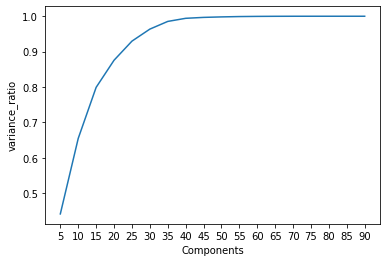

In [7]:
# this maybe cost many time, don't need run it aggain
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
variance_ratio = {}
for i in range(18):
    ncomp = (i+1)*5
    pca = PCA(n_components=ncomp)
    pca.fit(preprocessed_data)
    variance_ratio[ncomp] = sum(pca.explained_variance_ratio_)
plt.plot(variance_ratio.keys(),variance_ratio.values())
plt.xlabel('Components')
plt.xticks(np.arange(5,91,5))
plt.ylabel('variance_ratio')
plt.show()

In [8]:
# PCA step
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=40)
data_pca = pca.fit_transform(preprocessed_data)
data_pca

array([[ 6.87386205e-01,  7.44669741e-01, -3.66832180e-01, ...,
        -2.86797812e-02, -8.93339185e-03, -1.24409738e-02],
       [-2.04895271e-01,  9.26025604e-01,  3.70055350e-01, ...,
         2.63061038e-04, -6.86439201e-03,  1.91358040e-03],
       [-1.44375860e-01,  7.57566433e-01, -6.23469423e-01, ...,
         1.19136234e-04, -5.59090269e-02,  2.57825758e-04],
       ...,
       [ 7.54400920e-01,  8.41216174e-01, -5.70068969e-01, ...,
         3.05598953e-04, -9.34232916e-03, -1.88987206e-03],
       [-8.01517486e-01,  2.85435630e-01, -3.88717129e-01, ...,
        -3.19335901e-03,  2.69623568e-02, -2.09560458e-02],
       [ 1.83039942e+00, -1.73434487e-01,  9.06877161e-01, ...,
         3.83294914e-02,  8.23436704e-03, -5.15095916e-04]])

In [9]:
type(data_pca)

numpy.ndarray

In [10]:
# this maybe cost many time, don't need run it aggain
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans_inertias = []
kmeans_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(data_pca)
    kmeans_inertias.append(km.inertia_)
    kmeans_scores.append(silhouette_score(data_pca, km.labels_))

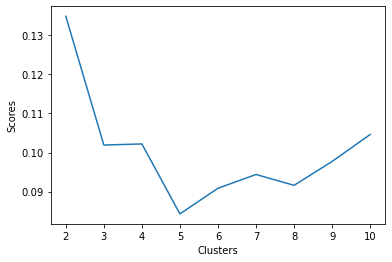

In [13]:
plt.plot(range(2,11),kmeans_scores)
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

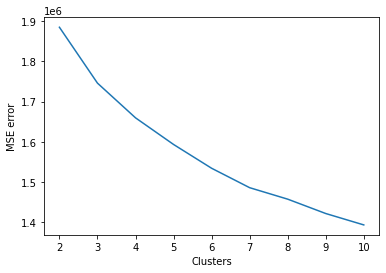

In [14]:
plt.plot(range(2,11),kmeans_inertias)
plt.xlabel('Clusters')
plt.ylabel('MSE error')
plt.show()

In [10]:
def splitClusters(label, shape, clusterNum):
    res = []
    for i in range(clusterNum):
        res.append([])
    for i in range(shape):
        res[label[i]].append(i)
    return res

In [11]:
longitude = df['Crash_Longitude_GDA94'].astype(float)-153 # our longitude is around 153
latitude = df['Crash_Latitude_GDA94'].astype(float)

In [40]:
# K-means
from sklearn.cluster import KMeans
clusternum = 6
km = KMeans(n_clusters=clusternum, init='k-means++',random_state=100)
km.fit(data_pca)
clusters = splitClusters(km.labels_,353651,clusternum)

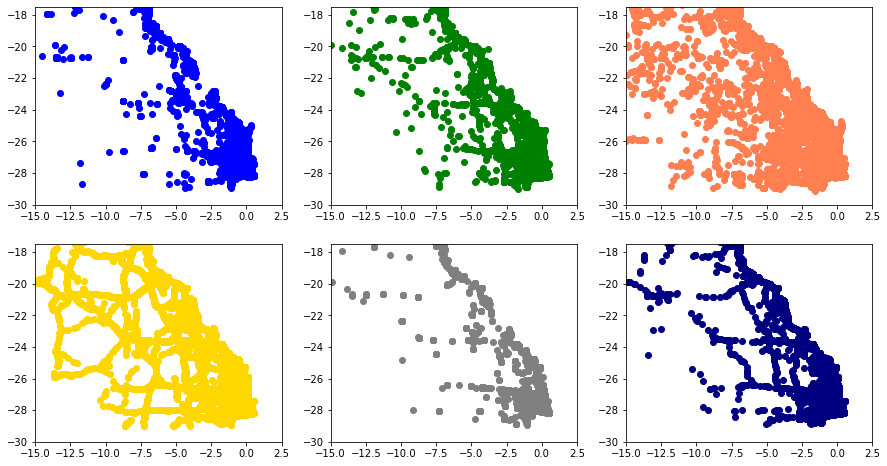

In [57]:
fig = plt.figure(figsize=(15,8))
colors = ['blue','green','coral','gold','gray','navy']
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.scatter(longitude[clusters[i]],latitude[clusters[i]],c=colors[i])
    plt.xlim(-15,2.5)  # longitude 138 to 155.5
    plt.ylim(-30,-17.5) #latitude
plt.show()

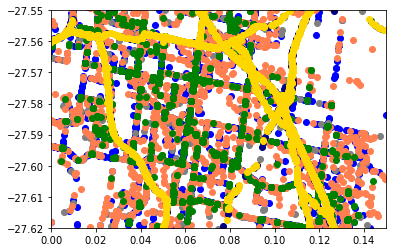

In [62]:
# this place is Sunnybank
plt.scatter(longitude[clusters[0]],latitude[clusters[0]],c='b')
plt.scatter(longitude[clusters[1]],latitude[clusters[1]],c='gray')
plt.scatter(longitude[clusters[2]],latitude[clusters[2]],c='coral')
plt.scatter(longitude[clusters[3]],latitude[clusters[3]],c='navy')
plt.scatter(longitude[clusters[4]],latitude[clusters[4]],c='green')
plt.scatter(longitude[clusters[5]],latitude[clusters[5]],c='gold')
plt.xlim(0,0.15)
plt.ylim(-27.62,-27.55)
plt.show()

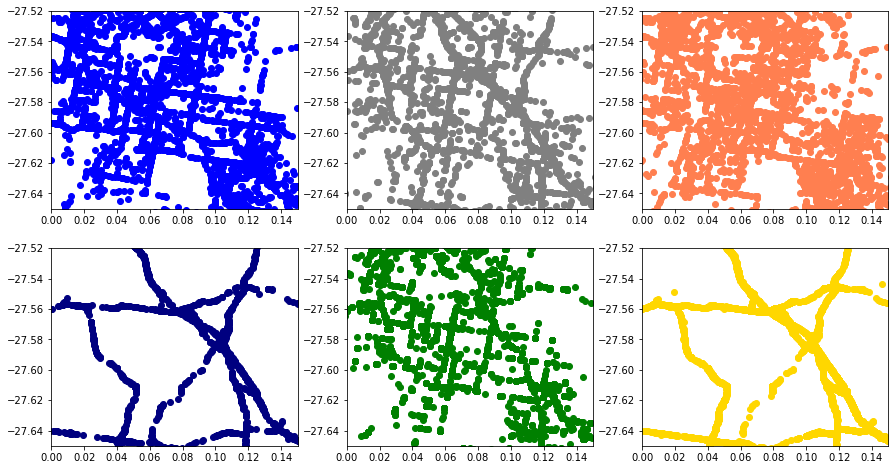

In [59]:
fig = plt.figure(figsize=(15,8))
colors = ['blue','gray','coral','navy','green','gold']
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.scatter(longitude[clusters[i]],latitude[clusters[i]],c=colors[i])
    plt.xlim(0,0.15)  # longitude 153 to 153.15
    plt.ylim(-27.65,-27.52) #latitude
plt.show()

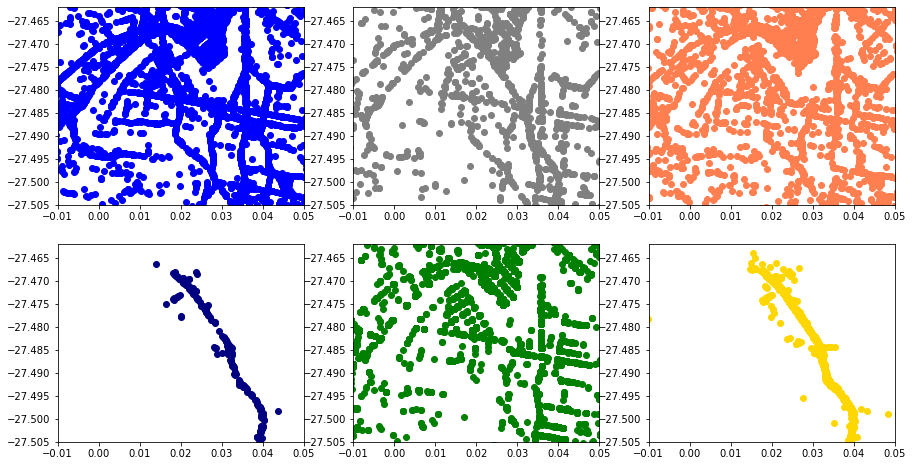

In [77]:
# this place is Woolloongabba
fig = plt.figure(figsize=(15,8))
colors = ['blue','gray','coral','navy','green','gold']
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.scatter(longitude[clusters[i]],latitude[clusters[i]],c=colors[i])
    plt.xlim(-0.01,0.05)  # longitude 153 to 153.15
    plt.ylim(-27.505,-27.462) #latitude
plt.show()

In [63]:
def proportions(data,cluster):
    dic = {}
    for i in data[cluster]:
        if i not in dic.keys():
            dic[i] = 1
        else:
            dic[i] += 1
    sum = 0
    for i in dic:
        sum += dic[i]
    for i  in dic:
        dic[i] /= sum
    return [(k,dic[k])for k in sorted(dic.keys())]

In [64]:
def show(pro):
    for i in pro:
        print(i[0],": ",i[1])

In [65]:
c0 = proportions(df['Crash_Severity'],clusters[3]+clusters[5]) # merge cluster 3 and 5 together
c1 = proportions(df['Crash_Severity'],clusters[1])
c2 = proportions(df['Crash_Severity'],clusters[2])
c3 = proportions(df['Crash_Severity'],clusters[0])
c4 = proportions(df['Crash_Severity'],clusters[4])
#c5 = proportions(df['Crash_Severity'],clusters[5])
print("---------------------------------------")
show(c0)
print("---------------------------------------")
show(c1)
print("---------------------------------------")
show(c2)
print("---------------------------------------")
show(c3)
print("---------------------------------------")
show(c4)
# print("---------------------------------------")
# show(c5)

---------------------------------------
Fatal :  0.023186855039083045
Hospitalisation :  0.3038684053029616
Medical treatment :  0.31279130923665643
Minor injury :  0.13234734035800433
Property damage only :  0.22780609006329458
---------------------------------------
Fatal :  0.010898394174663645
Hospitalisation :  0.25847518927520857
Medical treatment :  0.2740029898249506
Minor injury :  0.12817668900998216
Property damage only :  0.32844673771519506
---------------------------------------
Fatal :  0.021337710299548625
Hospitalisation :  0.36838736151005336
Medical treatment :  0.22772260976610587
Minor injury :  0.09941731637258924
Property damage only :  0.2831350020517029
---------------------------------------
Fatal :  0.0068321973385264525
Hospitalisation :  0.2490912041544953
Medical treatment :  0.37195715676728336
Minor injury :  0.1690197987666342
Property damage only :  0.20309964297306068
---------------------------------------
Fatal :  0.006036242659475262
Hospitalisatio

In [66]:
def pie_data(pro):
    return [i[1] for i in pro]
def pie_lab(pro):
    return [i[0] for i in pro]

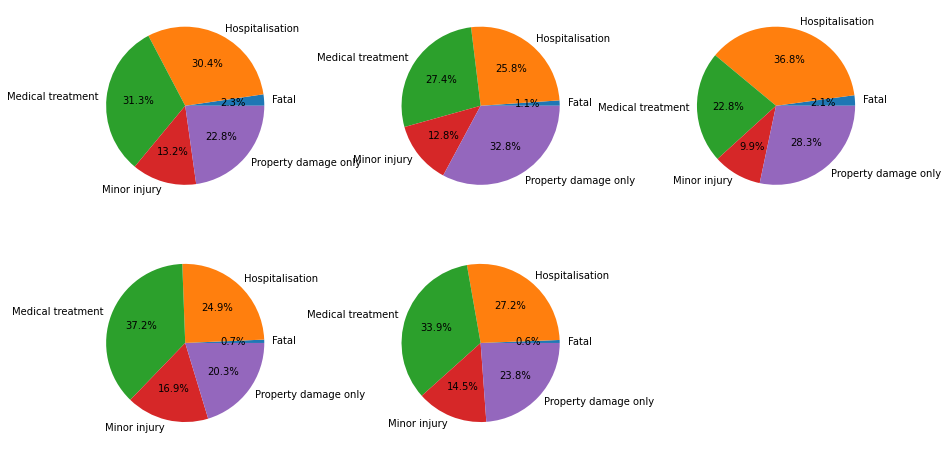

In [69]:
fig = plt.figure(figsize=(15,8))
c= [c0,c1,c2,c3,c4]
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.pie(pie_data(c[i]),labels =pie_lab(c[i]),autopct="%3.1f%%")
plt.show()

In [70]:
final_cluster_0 = clusters[3]+clusters[5]
final_cluster_1 = clusters[0]+clusters[4]
final_cluster_2 = clusters[1]+clusters[2]

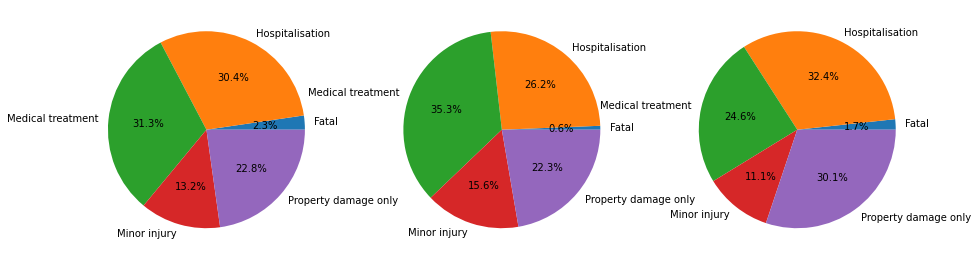

In [72]:
fig = plt.figure(figsize=(15,8))
final_clusters = [final_cluster_0,final_cluster_1,final_cluster_2]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.pie(pie_data(proportions(df['Crash_Severity'],final_clusters[i])),labels =pie_lab(c[i]),autopct="%3.1f%%")
plt.show()

<ipython-input-74-39dbf15c3189>:9: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(pie_data(c[i]),labels =pie_lab(c[i]),autopct="%3.1f%%")


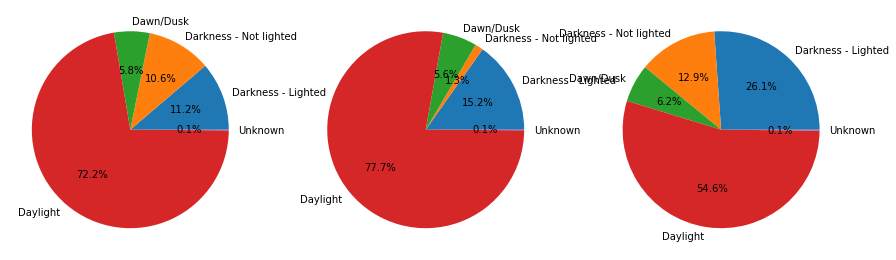

In [74]:
featurename = 'Crash_Lighting_Condition'
c0 = proportions(df[featurename],final_cluster_0)
c1 = proportions(df[featurename],final_cluster_1)
c2 = proportions(df[featurename],final_cluster_2)
fig = plt.figure(figsize=(15,8))
c= [c0,c1,c2]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.pie(pie_data(c[i]),labels =pie_lab(c[i]),autopct="%3.1f%%")
plt.show()


In [47]:
useful_data

,Crash_Severity,Crash_Nature,Crash_Type,Crash_Controlling_Authority,Crash_Roadway_Feature,Crash_Traffic_Control,Crash_Speed_Limit,Crash_Road_Surface_Condition,Crash_Atmospheric_Condition,Crash_Lighting_Condition,Crash_Road_Horiz_Align,Crash_Road_Vert_Align,DCA_Key_Approach_Dir
0,Property damage only,Overturned,Single Vehicle,Locally-controlled,No Roadway Feature,No traffic control,60 km/h,Unsealed - Dry,Clear,Daylight,Straight,Level,E
1,Property damage only,Hit object,Single Vehicle,Locally-controlled,Intersection - Cross,Operating traffic lights,60 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,N
2,Medical treatment,Hit pedestrian,Hit pedestrian,Locally-controlled,Intersection - T-Junction,No traffic control,0 - 50 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,W
3,Hospitalisation,Rear-end,Multi-Vehicle,Locally-controlled,Intersection - T-Junction,No traffic control,60 km/h,Sealed - Wet,Raining,Daylight,Curved - view open,Dip,W
4,Property damage only,Hit object,Single Vehicle,Locally-controlled,Intersection - T-Junction,Operating traffic lights,60 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353646,Hospitalisation,Angle,Multi-Vehicle,State-controlled,Intersection - T-Junction,Operating traffic lights,70 km/h,Sealed - Dry,Clear,Darkness - Lighted,Curved - view open,Level,E
353647,Medical treatment,Rear-end,Multi-Vehicle,State-controlled,Intersection - T-Junction,No traffic control,60 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,N
353648,Medical treatment,Hit object,Single Vehicle,Locally-controlled,No Roadway Feature,No traffic control,60 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,W
353649,Medical treatment,Angle,Multi-Vehicle,Locally-controlled,Intersection - T-Junction,No traffic control,80 - 90 km/h,Sealed - Dry,Clear,Daylight,Straight,Level,S
